In [1]:
# Importing libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image
import functions
from GP_action import GP_action
import time
import imageio
import pickle

In [2]:
Noise=False# Specify if noisy or not
Noise_level= 0.05 # if noisy, what is the noise sd
'''If the scaled X and Y is being used rememeber to scale the noise as well'''

'If the scaled X and Y is being used rememeber to scale the noise as well'

In [3]:
# The target function is assigned, chose 1 from the below

objective=functions.Hartmann_6()
objective=functions.Hartmann_3()
objective=functions.Ackley()
objective=functions.Rosenbrock()
objective=functions.Synthetic()
objective=functions.Shubert()
objective=functions.sin()
objective=functions.sin_2(Noise,Noise_level)
objective=functions.sincos(Noise,Noise_level)
objective=functions.Branin()
objective=functions.Shubert(Noise,Noise_level)
objective=functions.Kean(Noise,Noise_level)






print(objective.bounds)
# Extracting the bounded range of the inputs
func_bounds=bounds=np.array(
            [item[1] for item in sorted(objective.bounds.items(), key=lambda x: x[0])],dtype=np.float)
print(func_bounds)
print(objective.func(np.array([3,1])))


{'x': (-4, 4), 'y': (-4, 4)}
[[-4.  4.]
 [-4.  4.]]
0.219216704358195


In [4]:
# max budget for finding good point
Budget=150

# Acq_names=['PI','PG','EI','EG','gp_ucb','random','TS','SATS','G_ES','MES','GD']
acquation_function='gp_ucb'
function_bounds=func_bounds
func_name='Shubert'
Max=1.1 # function max

In [5]:

acq=['GD','gp_ucb','EI']
Mean_dict = {} 
std_dict={}
k=0
mean=np.zeros(150)
std=np.zeros(150)
seed=np.random.randint(10000, size=10)
while(k<5):
    temp_out=np.zeros(150)
    seed_count=0
    for m in range(0,10):
        samples=[]
        acquation_function=acq[k]
        seeds=seed[seed_count]
        Bo_test=GP_action(objective.func,function_bounds,Noise,Noise_level,acquation_function)
        Bo_test.initiate(seeds,n_random_draws=5)
        seed_count=seed_count+1
        flag = True
        i = 0
        samples.append(Max-np.max(Bo_test.Y))
        while flag:
            if i >= (Budget-1) :
                break
            Bo_test.sample_new_value()
            Regret= Max-np.max(Bo_test.Y)
            samples.append(Regret)
            i += 1
    
        out=np.array(samples)
        temp_out=np.vstack((temp_out, out))
        
    temp_out = np.delete(temp_out,(0), axis=0)
    mean_temp=np.mean(temp_out,axis=0)
    std_temp=0.5*np.sqrt(np.var(temp_out,axis=0)) # Calculating the one sided interval for 90% confidence

    mean=np.vstack((mean,mean_temp))
    std=np.vstack((std,std_temp))
    Mean_dict[acquation_function]=mean_temp
    std_dict[acquation_function]=std_temp
    k=k+1
    


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
1
estimated lengthscale and variance [1.  1.5]
3
2
4
3
1
4
estimated lengthscale and variance [1.  1.5]
0
5
3
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
7
estimated lengthscale and variance [1.  1.5]
1
8
0
9
3
10
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
4
1
2
2
estimated lengthscale and variance [1.         0.87324805]
1
0
4
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [1.  1.5]
1
0
1
1
4
2
estimated lengthscale and variance [1.  1.5]
4
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
5
estimated lengthscale and variance [1.         1.31506567]
3
6
3
7
3
8
estimated lengthscale and variance [1.  1.5]
3
9
4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [0.9268936  1.08630743]
0
1
0
2
2
3
estimated lengthscale and variance [1.         1.49999998]
1
4
3
5
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

6
estimated lengthscale and variance [1.         1.49999993]
2
7
4
8
0
9
estimated lengthscale and variance [0.98351504 0.50698003]
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
1
estimated lengthscale and variance [1.  1.5]
4
2
0
3
4
4
estimated lengthscale and variance [1.        0.6476747]
3
5
4
6
3
7
estimated lengthscale and variance [1.  1.5]
2
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
9
2
10
estimated lengthscale and variance [0.90564248 0.25192966]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
1
4
2
estimated lengthscale and variance [0.81687656 1.1380785 ]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
3
1
4
1
5
estimated lengthscale and variance [1.  1.5]
1
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
7
2
8
estimated lengthscale and variance [0.88032122 0.9585133 ]
1
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
estimated lengthscale and variance [0.72882501 1.24316764]
1
1
3
2
4
3
estimated lengthscale and variance [0.96061075 1.0568641 ]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
4
4
5
0
6
estimated lengthscale and variance [0.99621759 0.89471829]
2
7
4
8
0
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
1
1
estimated lengthscale and variance [0.84871379 0.85591612]
1
2
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
3
4
estimated lengthscale and variance [0.99053344 1.26069909]
1
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
6
1
7
estimated lengthscale and variance [0.95271939 0.70450337]
3
8
4
9
0
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.89750428 0.91693144]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
2
1
4
2
estimated lengthscale and variance [0.93976049 1.46335619]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
3
0
4
2
5
estimated lengthscale and variance [0.9224275  1.19681053]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
6
0
7
3
8
estimated lengthscale and variance [0.99999999 1.49999999]
4
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
estimated lengthscale and variance [0.4968309  0.66427555]
2
1
1
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
3
estimated lengthscale and variance [0.85191381 1.0211064 ]
1
4
2
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
6
estimated lengthscale and variance [0.99999998 1.49999983]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
7
3
8
1
9
estimated lengthscale and variance [0.97173936 0.56576797]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
3
1
estimated lengthscale and variance [1.        0.3559248]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
2
1
3
3
4
estimated lengthscale and variance [0.99640856 1.17304133]
1
5
0
6
3
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         0.96059357]
4
8
4
9
0
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.96631679 0.89340685]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
0
1
2
2
estimated lengthscale and variance [0.69186227 1.06640268]
2
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
4
4
5
estimated lengthscale and variance [0.98776715 1.33606226]
0
6
1
7
0
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.9464052  1.11194603]
0
9
3
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
estimated lengthscale and variance [0.99999998 1.5       ]
1
1
0
2
1
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.9990433  0.20595386]
4
4
0
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
6
estimated lengthscale and variance [0.97711426 1.39440468]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
7
1
8
0
9
estimated lengthscale and variance [0.99999999 1.49999997]
1
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
3
1
estimated lengthscale and variance [0.92363784 0.4103567 ]
2
2
3
3
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
estimated lengthscale and variance [0.96237983 1.27160927]
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

5
1
6
2
7
estimated lengthscale and variance [0.72954493 1.09177187]
1
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
9
4
10
estimated lengthscale and variance [0.99849993 0.48019137]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
0
1
estimated lengthscale and variance [1.  1.5]
0
2
1
3
1
4
estimated lengthscale and variance [1.  1.5]
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

5
0
6
3
7
estimated lengthscale and variance [1.         1.46204527]
0
8
2
9
1
10
estimated lengthscale and variance [0.95635611 0.84500676]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
1
1
1
2
estimated lengthscale and variance [1.         1.49999999]
1
3
1
4
1
5
estimated lengthscale and variance [1.         1.49999995]
1
6
1
7
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

8
estimated lengthscale and variance [1.         1.49999997]
1
9
1
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
estimated lengthscale and variance [0.9837863  1.49947683]
0
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
2
0
3
estimated lengthscale and variance [0.91886908 1.19367792]
0
4
0
5
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

6
estimated lengthscale and variance [1.  1.5]
1
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
8
0
9
estimated lengthscale and variance [0.91152274 1.31281877]
2
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
4
1
estimated lengthscale and variance [0.92211229 1.43067235]
0
2
2
3
2
4
estimated lengthscale and variance [0.94753228 1.03059933]
2
5
0
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
7
estimated lengthscale and variance [1.  1.5]
1
8
3
9
3
10
estimated lengthscale and variance [0.96475096 1.41658367]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
3
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
2
estimated lengthscale and variance [0.87744606 1.07496472]
4
3
1
4
1
5
estimated lengthscale and variance [1.  1.5]
3
6
4
7
4
8
estimated lengthscale and variance [0.98576295 0.78937783]
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

9
4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [1.  1.5]
3
1
1
2
4
3
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
4
2
5
1
6
estimated lengthscale and variance [1.  1.5]
0
7
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

8
4
9
estimated lengthscale and variance [1.  1.5]
1
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
1
1
estimated lengthscale and variance [1.  1.5]
2
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
3
0
4
estimated lengthscale and variance [1.  1.5]
1
5
0
6
2
7
estimated lengthscale and variance [0.93122767 0.62248902]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
8
0
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
10
estimated lengthscale and variance [0.98746656 1.11381004]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
2
1
2
2
estimated lengthscale and variance [1.         1.49999999]
2
3
1
4
2
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.93256347 0.99197232]
3
6
0
7
4
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.74921523 1.21082013]
4
9
2
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
estimated lengthscale and variance [1.         0.44654184]
3
1
2
2
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
estimated lengthscale and variance [0.99946854 1.45457188]
4
4
4
5
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

6
estimated lengthscale and variance [1.         0.88034806]
2
7
2
8
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

9
estimated lengthscale and variance [1.         1.42821978]
4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
2
1
estimated lengthscale and variance [1.         0.73013553]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
3
0
4
estimated lengthscale and variance [1.         1.49999991]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
5
3
6
1
7
estimated lengthscale and variance [1.         0.86214048]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
8
4
9
3
10
estimated lengthscale and variance [1.         1.49999998]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
0
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
2
estimated lengthscale and variance [0.66849166 0.6338592 ]
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
2
4
4
5
estimated lengthscale and variance [1.         1.49999985]
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

6
0
7
3
8
estimated lengthscale and variance [0.90175861 0.72012707]
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

9
3
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
estimated lengthscale and variance [1.         1.49999998]
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
2
3
3
estimated lengthscale and variance [0.93982721 1.13725138]
3
4
3
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
6
estimated lengthscale and variance [1.         0.71552801]
4
7
1
8
0
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         1.49999987]
3
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
0
1
estimated lengthscale and variance [1.         1.49999999]
1
2
1
3
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
estimated lengthscale and variance [0.99999999 1.49999995]
3
5
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

6
1
7
estimated lengthscale and variance [1.  1.5]
0
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
9
3
10
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
0
1
3
2
estimated lengthscale and variance [0.99464702 1.15526837]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
3
3
4
0
5
estimated lengthscale and variance [1.         1.49999991]
3
6
3
1
estimated lengthscale and variance [1.  1.5]
3
2
4
3
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
estimated lengthscale and variance [1.  1.5]
0
5
1
6
0
7
estimated lengthscale and variance [1.  1.5]
3
8
3
0
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
estimated lengthscale and variance [1.  1.5]
2
2
1
3
3
0
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
1
3
2
3
3
estimated lengthscale and variance [1.  1.5]
4
4
3
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
6
estimated lengthscale and variance [1.  1.5]
3
7
2
8
1
9
estimated lengthscale and variance [0.9990532  1.17034777]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
4
1
estimated lengthscale and variance [0.78538049 1.35937666]
1
2
3
3
4
4
estimated lengthscale and variance [1.  1.5]
4
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
6
0
7
estimated lengthscale and variance [1.         1.49999994]
3
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
9
3
10
estimated lengthscale and variance [1.         1.49999988]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
1
1
0
2
estimated lengthscale and variance [1.  1.5]
3
3
3
4
0
5
estimated lengthscale and variance [0.92989615 0.79242276]
0
6
2
7
1
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.  1.5]
2
9
1
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [1.  1.5]
0
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
2
3
3
estimated lengthscale and variance [1.  1.5]
4
4
1
5
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

6
estimated lengthscale and variance [1.  1.5]
1
7
1
8
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

9
estimated lengthscale and variance [0.99999999 1.49999999]
4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
4
1
estimated lengthscale and variance [1.         0.85224876]
1
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
3
0
4
estimated lengthscale and variance [0.831201   1.24555846]
1
5
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

6
2
7
estimated lengthscale and variance [1.         1.49999993]
1
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
9
1
10
estimated lengthscale and variance [1.         1.49999991]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
2
1
0
2
estimated lengthscale and variance [1.  1.5]
4
3
2
4
2
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.88404836 1.22981862]
2
6
4
7
1
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         0.47932034]
0
9
4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [1.         1.49999997]
3
1
1
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
3
estimated lengthscale and variance [1.         1.49999992]
1
4
0
5
4
6
estimated lengthscale and variance [0.93175185 1.04304949]
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

7
1
8
0
9
estimated lengthscale and variance [0.98504727 1.2382212 ]
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
4
1
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
4
estimated lengthscale and variance [0.95314535 0.74838053]
4
5
0
6
2
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.91912881 1.5       ]
4
8
0
9
3
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         0.97506046]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
2
1
3
2
estimated lengthscale and variance [1.         0.69590544]
2
3
2
4
2
5
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
6
4
7
0
8
estimated lengthscale and variance [0.95972494 0.61127692]
0
9
4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
estimated lengthscale and variance [0.95346603 1.08007889]
0
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
2
4
3
estimated lengthscale and variance [1.  1.5]
1
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
5
4
6
estimated lengthscale and variance [1.  1.5]
0
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
8
0
9
estimated lengthscale and variance [1.  1.5]
0
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
0
1
estimated lengthscale and variance [0.8526357  0.95700842]
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
3
3
4
4
estimated lengthscale and variance [0.94568822 0.8563824 ]
0
5
2
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
7
estimated lengthscale and variance [1.  1.5]
2
8
2
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
10
estimated lengthscale and variance [0.92776399 0.58929737]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
2
1
4
2
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
3
1
4
4
5
estimated lengthscale and variance [0.98913807 0.93767817]
4
6
1
7
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

8
estimated lengthscale and variance [0.91216127 1.07004728]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
9
1
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [0.96846267 0.89441513]
4
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
2
1
3
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
4
0
0
estimated lengthscale and variance [1.  1.5]
2
1
1
2
0
3
estimated lengthscale and variance [1.  1.5]
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
5
1
6
estimated lengthscale and variance [1.  1.5]
1
7
3
8
1
9
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
3
1
estimated lengthscale and variance [0.9146242  1.36920225]
1
0
1
1
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
estimated lengthscale and variance [1.  1.5]
1
3
2
4
1
5
estimated lengthscale and variance [1.         0.81330513]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
6
1
7
1
8
estimated lengthscale and variance [0.95460228 0.93379693]
1
9
1
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
estimated lengthscale and variance [1.         1.49999995]
0
1
1
2
1
3
estimated lengthscale and variance [0.9335074  0.89921969]
1
4
1
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
6
estimated lengthscale and variance [1.  1.5]
2
7
0
8
2
9
estimated lengthscale and variance [0.78487316 1.10377615]
3
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
2
1
estimated lengthscale and variance [1.  1.5]
3
2
0
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
4
estimated lengthscale and variance [1.  1.5]
4
5
0
6
0
7
estimated lengthscale and variance [0.78547884 0.96190088]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
8
0
9
0
10
estimated lengthscale and variance [1.         1.49999999]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
0
1
0
2
estimated lengthscale and variance [0.92195196 1.23490908]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
3
0
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
5
estimated lengthscale and variance [1.  1.5]
4
6
3
7
4
8
estimated lengthscale and variance [0.95984988 1.07314282]
0
9
0
0
3
0
estimated lengthscale and variance [1.  1.5]
3
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
2
1
3
estimated lengthscale and variance [1.  1.5]
2
4
4
5
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

6
estimated lengthscale and variance [0.92465008 1.20096745]
0
7
3
8
2
9
estimated lengthscale and variance [0.95927459 0.70989282]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
1
1
estimated lengthscale and variance [0.99123124 1.10306018]
3
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
3
4
4
estimated lengthscale and variance [1.  1.5]
0
5
4
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
7
estimated lengthscale and variance [1.         0.67519973]
1
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
9
3
10
estimated lengthscale and variance [1.         0.78044259]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
1
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
2
estimated lengthscale and variance [1.  1.5]
0
3
3
4
0
5
estimated lengthscale and variance [0.96843749 1.33584184]
2
6
4
7
1
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         0.74954068]
1
9
2
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
1
0
2
0
3
estimated lengthscale and variance [1.  1.5]
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
4
5
3
6
estimated lengthscale and variance [1.         0.94500775]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
7
3
0
1
1
estimated lengthscale and variance [0.96866354 0.96638394]
4
2
2
3
2
4
estimated lengthscale and variance [1.         1.49999999]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
6
4
7
estimated lengthscale and variance [1.  1.5]
4
8
2
9
1
10
estimated lengthscale and variance [0.97496792 1.45691074]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
3
1
4
2
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
3
0
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
5
estimated lengthscale and variance [0.95593003 0.7850797 ]
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

6
0
7
2
8
estimated lengthscale and variance [1.  1.5]
1
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
estimated lengthscale and variance [1.         0.38189116]
2
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
2
1
0
estimated lengthscale and variance [0.97981917 0.52923877]
1
1
1
2
4
3
estimated lengthscale and variance [0.99656629 0.88148163]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
4
3
5
3
6
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
7
4
8
1
9
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
1
estimated lengthscale and variance [1.  1.5]
3
2
4
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
4
estimated lengthscale and variance [0.94974152 1.48853754]
3
5
1
6
4
7
estimated lengthscale and variance [1.  1.5]
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

8
4
9
0
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.94818604 0.79197104]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
1
4
2
estimated lengthscale and variance [0.9817978  1.36549211]
2
3
3
1
estimated lengthscale and variance [1.  1.5]
3
2
2
3
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
estimated lengthscale and variance [1.  1.5]
3
5
3
6
3
7
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
8
3
9
0
10
estimated lengthscale and variance [0.96344854 1.20690783]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
4
1
1
2
estimated lengthscale and variance [0.99727541 1.48505965]
2
3
1
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
5
estimated lengthscale and variance [0.82309074 0.43822989]
2
6
3
7
4
8
estimated lengthscale and variance [0.86686577 1.07038346]
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

9
2
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [0.90704598 0.6417465 ]
1
1
0
2
3
3
estimated lengthscale and variance [0.9996075  1.49190576]
4
4
4
5
1
6
estimated lengthscale and variance [1.  1.5]
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

7
3
8
1
9
estimated lengthscale and variance [0.94990332 1.37327294]
2
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
4
1
estimated lengthscale and variance [0.93791875 1.3075988 ]
3
2
2
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
4
estimated lengthscale and variance [0.90172868 1.47131703]
3
5
2
0
1
1
estimated lengthscale and variance [0.96351872 0.78894781]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
2
4
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
4
estimated lengthscale and variance [0.94340109 1.34510045]
0
5
3
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
7
estimated lengthscale and variance [0.97345502 1.09895622]
4
0
2
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
2
estimated lengthscale and variance [0.99683123 0.20464285]
1
3
3
4
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

5
estimated lengthscale and variance [0.99654386 0.9698739 ]
3
6
1
7
1
8
estimated lengthscale and variance [1.         0.43481653]
2
9
4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
estimated lengthscale and variance [1.         0.35687299]
4
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
2
1
3
estimated lengthscale and variance [1.  1.5]
1
4
0
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
6
estimated lengthscale and variance [1.  1.5]
2
7
2
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
9
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
4
1
estimated lengthscale and variance [0.98349497 0.29611616]
1
2
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
4
estimated lengthscale and variance [1.         0.58854728]
4
5
4
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
7
estimated lengthscale and variance [0.97854494 1.12054278]
1
8
4
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
10
estimated lengthscale and variance [0.97489232 0.80710615]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
3
1
1
2
estimated lengthscale and variance [1.         1.48901095]
4
3
1
4
4
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         1.47031381]
0
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
7
0
8
estimated lengthscale and variance [1.         1.49999995]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [1.         1.19510887]
1
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
2
0
3
estimated lengthscale and variance [0.92133142 0.69252244]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
4
1
5
3
0
estimated lengthscale and variance [0.97299213 1.08447262]
4
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
2
3
3
estimated lengthscale and variance [1.         1.49999985]
0
4
3
0
0
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.  1.5]
4
2
2
3
3
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.9498558  0.71695108]
4
5
2
6
0
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         1.49999998]
0
8
0
9
1
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         1.49999996]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
0
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
2
estimated lengthscale and variance [1.         1.49999939]
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
4
4
5
estimated lengthscale and variance [1.         0.35596309]
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

6
2
7
2
8
estimated lengthscale and variance [0.93957646 1.31188323]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
9
3
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
estimated lengthscale and variance [0.6968145  0.55982567]
3
1
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
3
estimated lengthscale and variance [1.         1.49999992]
2
4
0
5
4
6
estimated lengthscale and variance [1.        1.4999995]
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

7
2
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
9
estimated lengthscale and variance [1.  1.5]
1
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
1
1
estimated lengthscale and variance [0.91647434 1.26569237]
2
2
4
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
4
estimated lengthscale and variance [1.  1.5]
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

5
4
6
2
7
estimated lengthscale and variance [0.91218088 0.80241798]
2
8
2
9
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

10
estimated lengthscale and variance [0.92354594 1.02072833]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
3
1
0
2
estimated lengthscale and variance [0.98312808 0.27169158]
1
3
3
0
estimated lengthscale and variance [1.  1.5]
4
0
4
1
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
estimated lengthscale and variance [1.  1.5]
4
1
0
2
4
3
estimated lengthscale and variance [1.  1.5]
4
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
5
4
6
estimated lengthscale and variance [1.  1.5]
4
7
3
8
1
9
estimated lengthscale and variance [1.  1.5]
0
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
3
1
estimated lengthscale and variance [1.         0.89412573]
0
2
1
3
3
4
estimated lengthscale and variance [1.  1.5]
4
5
0
6
3
7
estimated lengthscale and variance [1.         0.93334107]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
8
4
9
3
10
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
4
1
0
2
estimated lengthscale and variance [1.  1.5]
3
3
4
4
4
5
estimated lengthscale and variance [0.95775604 1.04566863]
2
6
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
1
1
estimated lengthscale and variance [1.  1.5]
0
2
1
3
3
4
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
5
2
6
2
7
estimated lengthscale and variance [1.  1.5]
3
8
3
9
1
10
estimated lengthscale and variance [0.98236465 1.44919679]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
2
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
2
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
3
3
4
1
5
estimated lengthscale and variance [1.  1.5]
2
0
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
2
estimated lengthscale and variance [0.97416163 0.87327967]
2
3
4
0
2
1
estimated lengthscale and variance [0.93488928 0.52759043]
3
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
3
1
4
estimated lengthscale and variance [1.  1.5]
0
5
3
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
7
estimated lengthscale and variance [0.86301822 1.4626013 ]
2
8
3
9
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


10
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
0
1
4
2
estimated lengthscale and variance [1.         1.49999999]
4
3
0
4
1
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.  1.5]
1
6
2
7
1
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         1.49999996]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
9
2
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
1
3
2
3
3
estimated lengthscale and variance [1.  1.5]
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
3
5
2
6
estimated lengthscale and variance [1.  1.5]
1
7
2
8
0
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.99396234 1.41838343]
3
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
3
1
estimated lengthscale and variance [1.         1.49999995]
0
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
3
3
4
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
6
1
7
estimated lengthscale and variance [1.  1.5]
3
8
1
9
3
10
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
0
1
0
2
estimated lengthscale and variance [1.  1.5]
0
3
3
4
4
5
estimated lengthscale and variance [0.91028122 0.98919437]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
6
3
7
4
8
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
9
0
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
estimated lengthscale and variance [1.  1.5]
0
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
2
2
3
estimated lengthscale and variance [1.  1.5]
0
4
4
5
2
6
estimated lengthscale and variance [1.  1.5]
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

7
1
8
2
9
estimated lengthscale and variance [0.98319411 1.49447279]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
3
1
estimated lengthscale and variance [1.         0.94641514]
3
2
4
3
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
5
4
6
1
7
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
8
0
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
10
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
0
1
2
2
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
3
4
4
0
5
estimated lengthscale and variance [1.  1.5]
4
6
0
7
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

8
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
9
3
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [1.  1.5]
3
1
4
2
2
3
estimated lengthscale and variance [1.  1.5]
4
4
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

5
0
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         0.53852071]
4
7
3
1
estimated lengthscale and variance [1.  1.5]
3
0
3
0
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
estimated lengthscale and variance [1.  1.5]
2
0
2
1
3
2
estimated lengthscale and variance [0.9853481  1.00091716]
4
3
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
2
5
estimated lengthscale and variance [1.         1.49999991]
2
0
2
0
2
1
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
2
3
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
4
estimated lengthscale and variance [1.  1.5]
2
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
1
1
2
estimated lengthscale and variance [0.99288748 1.09464585]
0
3
4
4
3
5
estimated lengthscale and variance [0.97157177 0.9247453 ]
3
6
2
7
4
8
estimated lengthscale and variance [0.99426028 1.33640475]
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

9
4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
estimated lengthscale and variance [1.        1.4999997]
0
1
0
2
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
estimated lengthscale and variance [1.         1.49999997]
0
4
0
5
0
6
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
7
0
8
0
9
estimated lengthscale and variance [0.90310413 0.90949367]
0
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
0
0
estimated lengthscale and variance [1.  1.5]
3
1
4
2
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
estimated lengthscale and variance [0.83293227 1.38013575]
2
4
0
5
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

6
estimated lengthscale and variance [0.9290122  0.59388676]
0
7
0
8
4
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.94890589 1.41401754]
2
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
1
estimated lengthscale and variance [1.  1.5]
1
2
4
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
4
estimated lengthscale and variance [1.  1.5]
0
5
4
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [0.99999999 0.79844779]
0
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
2
2
3
estimated lengthscale and variance [1.  1.5]
3
4
3
5
0
6
estimated lengthscale and variance [0.99999999 1.5       ]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
7
0
8
0
9
estimated lengthscale and variance [0.77892517 1.25698296]
2
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
1
1
estimated lengthscale and variance [1.         1.49999998]
3
2
3
3
2
4
estimated lengthscale and variance [0.98840989 1.33932622]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
5
2
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
7
estimated lengthscale and variance [0.81158284 1.28189831]
3
8
2
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
10
estimated lengthscale and variance [0.94637193 0.71023637]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
1
1
2
estimated lengthscale and variance [1.  1.5]
3
3
2
4
4
5
estimated lengthscale and variance [1.  1.5]
3
6
4
7
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

8
estimated lengthscale and variance [1.         1.49999982]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
9
4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
estimated lengthscale and variance [0.94742548 1.05291853]
3
1
2
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
3
estimated lengthscale and variance [0.93657022 1.0046107 ]
0
4
1
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
6
estimated lengthscale and variance [0.95809709 1.15418566]
2
7
2
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
9
estimated lengthscale and variance [1.         0.66997575]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
0
1
estimated lengthscale and variance [0.87968119 1.1977537 ]
4
2
4
3
3
4
estimated lengthscale and variance [0.68147183 1.31786762]
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

5
3
6
4
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.  1.5]
2
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
9
3
10
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
0
1
4
2
estimated lengthscale and variance [1.         1.35059964]
1
3
1
4
4
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.96231837 1.02763323]
4
6
3
7
0
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         1.49999982]
4
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
estimated lengthscale and variance [0.90049085 1.42843942]
3
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
2
2
3
estimated lengthscale and variance [0.88997861 0.75488823]
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
5
1
6
estimated lengthscale and variance [1.         1.00767039]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
7
0
8
2
9
estimated lengthscale and variance [1.         0.53304933]
2
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
0
1
estimated lengthscale and variance [1.         1.49999994]
1
2
0
3
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
estimated lengthscale and variance [1.         1.49999982]
4
5
2
6
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

7
estimated lengthscale and variance [1.  1.5]
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

8
3
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
10
estimated lengthscale and variance [0.86653477 0.62768646]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
0
1
1
2
estimated lengthscale and variance [0.97352395 0.91159834]
2
3
0
1
estimated lengthscale and variance [1.  1.5]
0
2
3
3
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
estimated lengthscale and variance [1.  1.5]
2
5
4
6
4
7
estimated lengthscale and variance [1.  1.5]
4
8
1
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
10
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
4
1
0
2
estimated lengthscale and variance [0.91770636 0.43990349]
2
3
2
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
5
estimated lengthscale and variance [1.         1.49999992]
4
6
0
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
8
estimated lengthscale and variance [0.98192977 1.0073577 ]
0
9
0
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [1.  1.5]
1
1
0
2
4
3
estimated lengthscale and variance [0.94066517 0.99687268]
1
4
4
5
3
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         1.25998299]
4
7
4
8
4
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         1.49983831]
4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
3
1
estimated lengthscale and variance [1.         1.49999997]
4
2
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
2
0
estimated lengthscale and variance [0.9252259  1.43842168]
2
1
1
2
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
estimated lengthscale and variance [0.9719391 0.9910559]
3
0
3
1
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
estimated lengthscale and variance [0.90484265 1.44473246]
0
3
0
4
2
5
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
6
4
7
3
8
estimated lengthscale and variance [1.         1.49999973]
2
9
2
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [1.         0.78515835]
3
1
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
3
3
estimated lengthscale and variance [0.96927821 0.40863413]
2
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
5
2
6
estimated lengthscale and variance [0.99936473 0.54094847]
3
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
9
estimated lengthscale and variance [1.  1.5]
2
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
2
1
estimated lengthscale and variance [0.94252554 1.05828172]
1
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
3
1
4
estimated lengthscale and variance [0.93147374 1.37510958]
2
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
6
1
0
estimated lengthscale and variance [0.98765284 0.29706528]
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
2
1
2
2
estimated lengthscale and variance [1.  1.5]
1
3
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
3
5
estimated lengthscale and variance [0.86643484 0.50019756]
0
6
0
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
8
estimated lengthscale and variance [0.8163847  1.41936232]
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

9
1
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
estimated lengthscale and variance [0.94829791 1.13064614]
2
1
4
2
0
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.97567235 0.53287766]
4
4
0
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
6
estimated lengthscale and variance [1.         1.49999994]
2
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
8
0
9
estimated lengthscale and variance [1.  1.5]
3
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
2
1
estimated lengthscale and variance [0.99381814 1.4226653 ]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
2
3
3
4
4
estimated lengthscale and variance [1.         1.49999992]
1
5
0
6
3
7
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
8
2
9
3
10
estimated lengthscale and variance [0.95582598 0.47088379]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
2
1
1
2
estimated lengthscale and variance [0.98062581 0.8097603 ]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
3
0
4
1
5
estimated lengthscale and variance [1.  1.5]
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

6
1
7
1
8
estimated lengthscale and variance [0.90597658 1.3647175 ]
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

9
3
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
estimated lengthscale and variance [0.93293879 0.862893  ]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
1
4
2
1
3
estimated lengthscale and variance [0.94390458 1.46859145]
4
4
2
5
1
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.97788325 1.02846864]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
7
4
8
2
9
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
0
1
estimated lengthscale and variance [1.  1.5]
4
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
3
3
4
estimated lengthscale and variance [0.99832755 0.67562317]
0
5
4
6
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

7
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
8
0
9
0
10
estimated lengthscale and variance [0.94978638 1.27138818]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
1
1
4
2
estimated lengthscale and variance [1.  1.5]
3
3
0
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
5
estimated lengthscale and variance [0.86716569 1.02546926]
0
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
7
0
8
estimated lengthscale and variance [1.  1.5]
0
9
0
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
estimated lengthscale and variance [0.9481938  1.14631303]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
1
0
0
estimated lengthscale and variance [1.  1.5]
0
1
1
2
3
3
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
4
2
5
4
6
estimated lengthscale and variance [1.  1.5]
0
0
0
1
2
2
estimated lengthscale and variance [1.  1.5]
4
3
4
4
4
5
estimated lengthscale and variance [1.  1.5]
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

6
0
7
4
8
estimated lengthscale and variance [0.97361256 1.48054965]
2
9
2
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
estimated lengthscale and variance [0.84507493 1.02887558]
2
1
4
2
3
3
estimated lengthscale and variance [1.  1.5]
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
1
5
3
6
estimated lengthscale and variance [1.  1.5]
0
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
8
3
0
estimated lengthscale and variance [1.  1.5]
0
1
3
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
3
estimated lengthscale and variance [1.  1.5]
1
0
0
1
0
2
estimated lengthscale and variance [1.         1.49999996]
4
3
1
4
0
5
estimated lengthscale and variance [0.96737748 0.87333716]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
6
3
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
8
estimated lengthscale and variance [1.  1.5]
3
9
4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
estimated lengthscale and variance [1.         1.49999976]
0
1
0
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [0.99775236 0.8609287 ]
0
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
3
estimated lengthscale and variance [1.  1.5]
2
4
4
5
3
6
estimated lengthscale and variance [0.93193507 1.03043081]
1
7
2
8
2
9
estimated lengthscale and variance [1.  1.5]
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
3
1
estimated lengthscale and variance [1.  1.5]
2
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
3
3
4
estimated lengthscale and variance [1.  1.5]
3
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
6
4
7
estimated lengthscale and variance [0.92990832 1.32692424]
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

8
4
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
10
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
4
1
3
2
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
3
0
4
4
5
estimated lengthscale and variance [1.  1.5]
0
6
4
7
3
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         1.49999998]
2
9
2
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [1.  1.5]
0
1
1
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
3
estimated lengthscale and variance [1.         1.49999999]
2
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
5
3
6
estimated lengthscale and variance [0.9520371  0.52155566]
3
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
8
0
9
estimated lengthscale and variance [0.95289725 1.15098861]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
2
1
estimated lengthscale and variance [0.92734746 0.68865219]
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
2
3
3
4
estimated lengthscale and variance [1.         1.49999999]
0
5
0
6
2
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.98607722 1.27958005]
3
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
9
2
10
estimated lengthscale and variance [1.         1.49999999]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
3
1
0
2
estimated lengthscale and variance [0.97302611 0.89409472]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
3
4
4
4
5
estimated lengthscale and variance [0.93921266 0.33151321]
1
6
2
7
4
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.98416982 1.48107007]
2
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [0.9165673  1.16473701]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
1
0
2
1
3
estimated lengthscale and variance [0.99980866 0.62182673]
3
4
0
5
4
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         1.49999999]
1
7
0
8
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

9
estimated lengthscale and variance [0.99528746 1.27246484]
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
0
1
estimated lengthscale and variance [1.         0.83728838]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
2
0
3
1
4
estimated lengthscale and variance [1.  1.5]
2
5
3
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
7
estimated lengthscale and variance [0.91560511 0.56615418]
2
8
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

9
0
10
estimated lengthscale and variance [1.         1.49999999]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
3
1
3
2
estimated lengthscale and variance [1.         0.59576351]
2
3
2
4
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

5
estimated lengthscale and variance [1.  1.5]
2
6
0
7
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

8
estimated lengthscale and variance [0.96665138 1.39116053]
0
9
0


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [0.98434486 0.64563064]
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
1
2
1
3
estimated lengthscale and variance [0.93690814 0.61028567]
1
4
4
1
estimated lengthscale and variance [1.  1.5]
4
2
3
3
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
estimated lengthscale and variance [1.  1.5]
2
5
0
6
4
7
estimated lengthscale and variance [1.  1.5]
2
8
0
9
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
estimated lengthscale and variance [1.  1.5]
3
0
3
1
2
2
estimated lengthscale and variance [1.  1.5]
4
3
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
1
5
estimated lengthscale and variance [1.         1.49999999]
2
6
3
7
1
8
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
estimated lengthscale and variance [1.  1.5]
0
1
3
2
1
3
estimated lengthscale and variance [0.97138747 0.30995225]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
4
4
5
0
6
estimated lengthscale and variance [1.  1.5]
3
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
9
estimated lengthscale and variance [1.  1.5]
1
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
2
1
estimated lengthscale and variance [1.  1.5]
0
2
3
3
4
4
estimated lengthscale and variance [1.  1.5]
4
5
4
6
1
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.  1.5]
0
8
4
9
0
10
estimated lengthscale and variance [0.95285275 0.73687574]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
1
1
3
2
estimated lengthscale and variance [0.99061208 1.26761927]
3
3
4
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
5
estimated lengthscale and variance [0.98237274 1.43872177]
4
6
3
7
4
8
estimated lengthscale and variance [0.95279277 0.90069155]
0
9
1
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
0
estimated lengthscale and variance [1.  1.5]
2
1
4
2
2
3
estimated lengthscale and variance [1.         1.49999997]
3
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
6
estimated lengthscale and variance [1.  1.5]
2
7
2
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
9
estimated lengthscale and variance [0.97919117 0.78102028]
4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
0
2
1
estimated lengthscale and variance [1.  1.5]
0
2
0
3
2
4
estimated lengthscale and variance [0.88852161 1.37658011]
2
5
2
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
7
estimated lengthscale and variance [0.98190969 1.37607505]
0
8
2
9
0
10
estimated lengthscale and variance [0.94998493 1.11081553]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
3
1
4
2
estimated lengthscale and variance [0.92343877 0.89578474]
1
3
4
0
4
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         1.49999998]
4
2
2
3
0
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.95114209 0.55941082]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
6
2
7
estimated lengthscale and variance [0.80315034 1.20543822]
1
8


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
9
0
10
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
2
1
4
2
estimated lengthscale and variance [0.97008374 0.49167042]
2
3
2
4
2
5


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [1.         1.37484709]
0
6
2
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
8
estimated lengthscale and variance [1.  1.5]
1
0
3
1
2
2
estimated lengthscale and variance [1.  1.5]
4
3


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
4
1
5
estimated lengthscale and variance [1.         0.65630775]
0
6
1
7


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
8
estimated lengthscale and variance [0.85848483 1.47301937]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

4
9
3
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
0
estimated lengthscale and variance [0.83618283 1.05355824]
0
1
1
2
2
3
estimated lengthscale and variance [0.94777304 1.22612161]
3
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
5
2
6


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.84087577 1.11066475]
4
7
4
8
0
9


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

estimated lengthscale and variance [0.97688812 0.74330127]
4
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
1
1
estimated lengthscale and variance [1.        1.0134154]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
2
0
3
2
4
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
5
0
6
2
7
estimated lengthscale and variance [1.  1.5]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

3
8
4
9
1
10
estimated lengthscale and variance [1.         0.39637104]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

0
0
4
1


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

2
2
estimated lengthscale and variance [0.97434578 1.39606155]


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
3
2
4
0
5
estimated lengthscale and variance [1.  1.5]
4
6
3
7
2


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

8
estimated lengthscale and variance [1.  1.5]
4
9
0
10


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
0
estimated lengthscale and variance [1.  1.5]
2
1
4
2
2
3
estimated lengthscale and variance [1.  1.5]
0
4


 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
 /home/selwyn/GP_Grad/Code/methods.py:100: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise 

1
estimated lengthscale and variance [1.  1.5]
2
3
4
estimated lengthscale and variance [1.  1.5]
5
6
7
estimated lengthscale and variance [1.  1.5]
8
9
10
estimated lengthscale and variance [1.  1.5]
0
1
2
estimated lengthscale and variance [1.  1.5]
3
4
5
estimated lengthscale and variance [1.  1.5]
6
7
0
estimated lengthscale and variance [1.         0.82032778]
0
0
0
estimated lengthscale and variance [1.  1.5]
0
1
2
estimated lengthscale and variance [1.  1.5]
3
4
5
estimated lengthscale and variance [1.         0.95157587]
6
7
8
estimated lengthscale and variance [1.  1.5]
9
0
1
estimated lengthscale and variance [1.         1.48872918]
2
3
0
estimated lengthscale and variance [0.95625444 1.42183736]
1
2
3
estimated lengthscale and variance [1.  1.5]
4
5
6
estimated lengthscale and variance [1.  1.5]
7
8
9
estimated lengthscale and variance [0.99071389 1.45453236]
10
0
1
estimated lengthscale and variance [1.  1.5]
2
3
4
estimated lengthscale and variance [1.         1.34568699]


5
6
7
estimated lengthscale and variance [1.  1.5]
8
9
10
estimated lengthscale and variance [1.  1.5]
0
1
2
estimated lengthscale and variance [0.97241761 1.43717954]
3
4
5
estimated lengthscale and variance [0.91941556 0.71586072]
6
7
8
estimated lengthscale and variance [0.96604568 1.3451848 ]
9
10
0
estimated lengthscale and variance [1.  1.5]
1
2
3
estimated lengthscale and variance [0.88418918 1.43393639]
4
5
6
estimated lengthscale and variance [0.87791274 1.47862413]
7
8
9
estimated lengthscale and variance [0.99057556 1.30296827]
10
1
estimated lengthscale and variance [1.  1.5]
2
0
1
estimated lengthscale and variance [1.  1.5]
2
3
4
estimated lengthscale and variance [1.  1.5]
5
6
0
estimated lengthscale and variance [1.  1.5]
1
2
3
estimated lengthscale and variance [1.  1.5]
4
5
6
estimated lengthscale and variance [0.58128257 1.02280122]
7
8
9
estimated lengthscale and variance [1.  1.5]
10
0
1
estimated lengthscale and variance [1.  1.5]
0
1
2
estimated lengthscale and v

5
6
7
estimated lengthscale and variance [1.         1.49999996]
8
9
10
estimated lengthscale and variance [1.         1.49999993]
0
1
2
estimated lengthscale and variance [1.         1.49999999]
3
4
5
estimated lengthscale and variance [1.         1.35227031]
6
7
8
estimated lengthscale and variance [1.         1.49999991]
9
10
0
estimated lengthscale and variance [1.  1.5]
1
2
3
estimated lengthscale and variance [0.87408279 1.41704693]
0
1
2
estimated lengthscale and variance [0.95660273 1.03210687]
3
4
5
estimated lengthscale and variance [0.97119525 1.16615415]
6
7
8
estimated lengthscale and variance [1.  1.5]
9
10
0
estimated lengthscale and variance [0.69725323 0.51414053]
1
2
3
estimated lengthscale and variance [0.92527448 0.86226837]
4
5
6
estimated lengthscale and variance [1.         1.08895591]
7
8
9
estimated lengthscale and variance [1.  1.5]
10
0
1
estimated lengthscale and variance [1.         0.71601063]
2
3
4
estimated lengthscale and variance [0.99905724 0.94463658

0
1
2
estimated lengthscale and variance [1.         1.49999994]
3
4
0
estimated lengthscale and variance [0.99397291 0.44542508]
0
1
2
estimated lengthscale and variance [1.  1.5]
3
4
5
estimated lengthscale and variance [1.  1.5]
6
7
0
estimated lengthscale and variance [0.93413374 0.31312489]
1
2
3
estimated lengthscale and variance [1.  1.5]
4
5
6
estimated lengthscale and variance [1.  1.5]
7
8
9
estimated lengthscale and variance [0.97874903 1.49138403]
10
0
0
estimated lengthscale and variance [1.  1.5]
1
2
3
estimated lengthscale and variance [1.  1.5]
4
5
6
estimated lengthscale and variance [1.  1.5]
7
8
9
estimated lengthscale and variance [1.  1.5]
0
1
2
estimated lengthscale and variance [1.  1.5]
3
4
5
estimated lengthscale and variance [1.  1.5]
6
7
8
estimated lengthscale and variance [1.         0.57607613]
9
0
1
estimated lengthscale and variance [0.99974794 0.42116866]
2
3
4
estimated lengthscale and variance [1.  1.5]
5
6
7
estimated lengthscale and variance [1.  1.

7
estimated lengthscale and variance [1.  1.5]
8
9
10
estimated lengthscale and variance [1.  1.5]
0
1
2
estimated lengthscale and variance [1.  1.5]
3
4
5
estimated lengthscale and variance [1.  1.5]
6
7
8
estimated lengthscale and variance [1.  1.5]
9
10
0
estimated lengthscale and variance [1.  1.5]
1
2
3
estimated lengthscale and variance [0.9877494  1.20905127]
4
5
6
estimated lengthscale and variance [0.82020143 0.84259201]
7
8
9
estimated lengthscale and variance [0.88557903 1.22031554]
10
0
1
estimated lengthscale and variance [1.  1.5]
2
3
4
estimated lengthscale and variance [1.  1.5]
5
6
0
estimated lengthscale and variance [0.84847182 1.42448049]
1
2
3
estimated lengthscale and variance [1.         1.49999987]
4
5
6
estimated lengthscale and variance [0.99999998 1.49999997]
7
8
9
estimated lengthscale and variance [0.99844877 1.38292832]
10
0
1
estimated lengthscale and variance [1.  1.5]
2
3
0
estimated lengthscale and variance [0.93553206 0.90533675]
1
2
3
estimated lengt

5
6
estimated lengthscale and variance [0.99334412 1.4486291 ]
7
8
9
estimated lengthscale and variance [0.96099202 1.4467752 ]
10
0
1
estimated lengthscale and variance [0.97560157 0.96937917]
2
3
4
estimated lengthscale and variance [1.  1.5]
5
6
7
estimated lengthscale and variance [1.  1.5]
8
9
10
estimated lengthscale and variance [1.  1.5]
0
1
2
estimated lengthscale and variance [1.  1.5]
3
4
5
estimated lengthscale and variance [0.95211171 1.24532339]
6
7
8
estimated lengthscale and variance [0.93481418 1.12246831]
9
10
0
estimated lengthscale and variance [0.96337545 1.05981809]
1
2
3
estimated lengthscale and variance [1.  1.5]
4
5
6
estimated lengthscale and variance [0.95078493 1.21767324]
7
8
9
estimated lengthscale and variance [1.  1.5]
10
0
1
estimated lengthscale and variance [0.97634183 0.66017841]
2
1
estimated lengthscale and variance [1.  1.5]
2
3
4
estimated lengthscale and variance [1.  1.5]
5
6
7
estimated lengthscale and variance [1.  1.5]
8
9
10
estimated leng

estimated lengthscale and variance [1.         1.49999944]
10
0
1
estimated lengthscale and variance [0.76194225 1.18179849]
2
3
4
estimated lengthscale and variance [0.78431467 1.27089321]
5
6
7
estimated lengthscale and variance [0.94268462 1.40089286]
8
9
10
estimated lengthscale and variance [0.99380769 0.96995427]
0
1
2
estimated lengthscale and variance [1.         1.49999998]
3
4
5
estimated lengthscale and variance [0.99999999 1.49999987]
6
7
8
estimated lengthscale and variance [1.         1.49999998]
9
10
0
estimated lengthscale and variance [0.58191432 1.1514823 ]
1
2
3
estimated lengthscale and variance [1.         1.49999998]
4
5
6
estimated lengthscale and variance [1.         0.97229543]
7
8
9
estimated lengthscale and variance [0.73666622 1.14217913]
10
0
1
estimated lengthscale and variance [0.79956285 0.7162973 ]
2
3
4
estimated lengthscale and variance [0.90121479 1.49060894]
5
6
7
estimated lengthscale and variance [0.99552466 1.12755966]
8
9
10
estimated lengthscal

2
3
4
estimated lengthscale and variance [0.99783597 1.08338057]
5
6
7
estimated lengthscale and variance [0.99706553 1.47556168]
8
9
10
estimated lengthscale and variance [0.97732089 0.90272093]
0
1
2
estimated lengthscale and variance [1.         1.49999983]
3
4
5
estimated lengthscale and variance [1.         1.49999999]
6
7
8
estimated lengthscale and variance [0.98142161 0.3807074 ]
9
10
0
estimated lengthscale and variance [1.  1.5]
1
2
3
estimated lengthscale and variance [0.50173889 0.92013744]
4
0
1
estimated lengthscale and variance [0.99999996 1.5       ]
2
3
4
estimated lengthscale and variance [0.96887231 0.85341854]
5
6
7
estimated lengthscale and variance [0.94288274 0.65505017]
8
9
10
estimated lengthscale and variance [0.81670831 0.42962922]
0
1
2
estimated lengthscale and variance [1.  1.5]
3
4
5
estimated lengthscale and variance [1.  1.5]
6
7
8
estimated lengthscale and variance [1.  1.5]
9
10
0
estimated lengthscale and variance [0.97746015 0.95355157]
1
2
3
estima

IndexError: list index out of range

In [6]:
def save_obj(obj, name ):
    with open('data/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('data/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [7]:
#save_obj(Mean_dict,func_name+'_Mean_'+'noisy_'+'Regret')
#save_obj(std_dict,func_name+'_Error_'+'noisy_'+'Regret')
save_obj(Mean_dict,func_name+'_Mean_'+'Regret')
save_obj(std_dict,func_name+'_Error_'+'Regret')



In [8]:
plt.style.use('default')
import seaborn as sns
colors = sns.color_palette("dark")
greens = sns.color_palette("BuGn", 10)
blues = sns.color_palette("PuBu", 10)
reds = sns.color_palette("YlOrRd", 10)
purples = sns.color_palette("PuOr", 10)

def save_plot_T(mean,std):
    GD=np.arange(0,150,1)
    GP_UCB=np.arange(0,150,1)
    EI=np.arange(0,150,1)
    i=150
    
    # naming the x axis 
    fig,(ax1)=plt.subplots(figsize=(4.5, 3))
    plt.xlabel('Queries', fontsize=10) 
    # naming the y axis 
    plt.ylabel('Simple Regret',fontsize=10) 
    # giving a title to my graph 
    plt.title('')
    # show a legend on the plot 
    plt.legend() 
    ax1.plot(GD[:i], mean['GD'][:i],'-',color=reds[-1]) 
    ax1.plot(GP_UCB[:i], mean['gp_ucb'][:i],'--',color=blues[-1]) 
    ax1.plot(EI[:i], mean['EI'][:i],'-.',color=purples[-1])
    
    ax1.errorbar(GD[:i],mean['GD'][:i],yerr=std['GD'][:i],label="GD",linestyle='-',color=reds[-1],fmt='s',capsize=3,errorevery=5,markevery=5,lw=1.5)
    ax1.errorbar(GP_UCB[:i],mean['gp_ucb'][:i],yerr=std['gp_ucb'][:i],label="gp_ucb",linestyle='--',color= blues[-1],fmt='^',capsize=3,errorevery=5,markevery=5,lw=1.5)
    ax1.errorbar(EI[:i],mean['EI'][:i],yerr=std['EI'][:i],label="EI",linestyle='-.',color=purples[-1],fmt='>',capsize=3,errorevery=5,markevery=5,lw=1.5)

    ax1.legend(loc='upper right',fontsize=10)
    # function to show the plot
#    plt.fill_between(x, mean[1]-std[1], mean[1]+std[1],color='C0', alpha = 0.3)
#    plt.fill_between(x, mean[2]-std[2], mean[2]+std[2],color='C2', alpha = 0.3)
#    plt.fill_between(x, mean[3]-std[3], mean[3]+std[3],color='C4', alpha = 0.3)
    
    plt.show()
    fig.savefig('Kean_noisless.pdf', bbox_inches='tight')

No handles with labels found to put in legend.


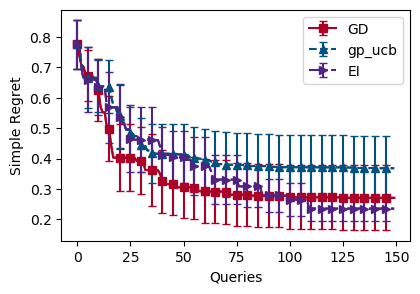

In [9]:
#mean=load_obj(func_name+'_Mean_'+'noisy_'+'Regret')
#error=load_obj(func_name+'_Error_'+'noisy_'+'Regret')
mean=load_obj(func_name+'_Mean_'+'Regret')
error=load_obj(func_name+'_Error_'+'Regret')
save_plot_T(mean,error)
